# Figure 5

This figure contains the heatmap of the theta and TVD values, as well as the scatter plot of the same values

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#Folders
projpath = os.path.realpath("../..")
pathfig  = os.path.join(projpath, "Results", "Figures")
pathres  = os.path.join(projpath, "Results")

In [3]:
os.chdir(pathres)
dists = np.array(pd.read_csv("distance_matrices.csv", header=None))
scaled_dists = dists
low_indices  = np.tril_indices(11, k = -1)
tvds  = dists[low_indices]
dt    = dists.transpose()
theta = dt[low_indices]

#Scaling values and pasting them
scaled_tvds = (tvds - tvds.min() ) / np.ptp(tvds)
scaled_theta = (theta - theta.min() ) / np.ptp(theta)
scaled_dists.transpose()[low_indices] = scaled_theta
scaled_dists[low_indices] = scaled_tvds

Plot figure

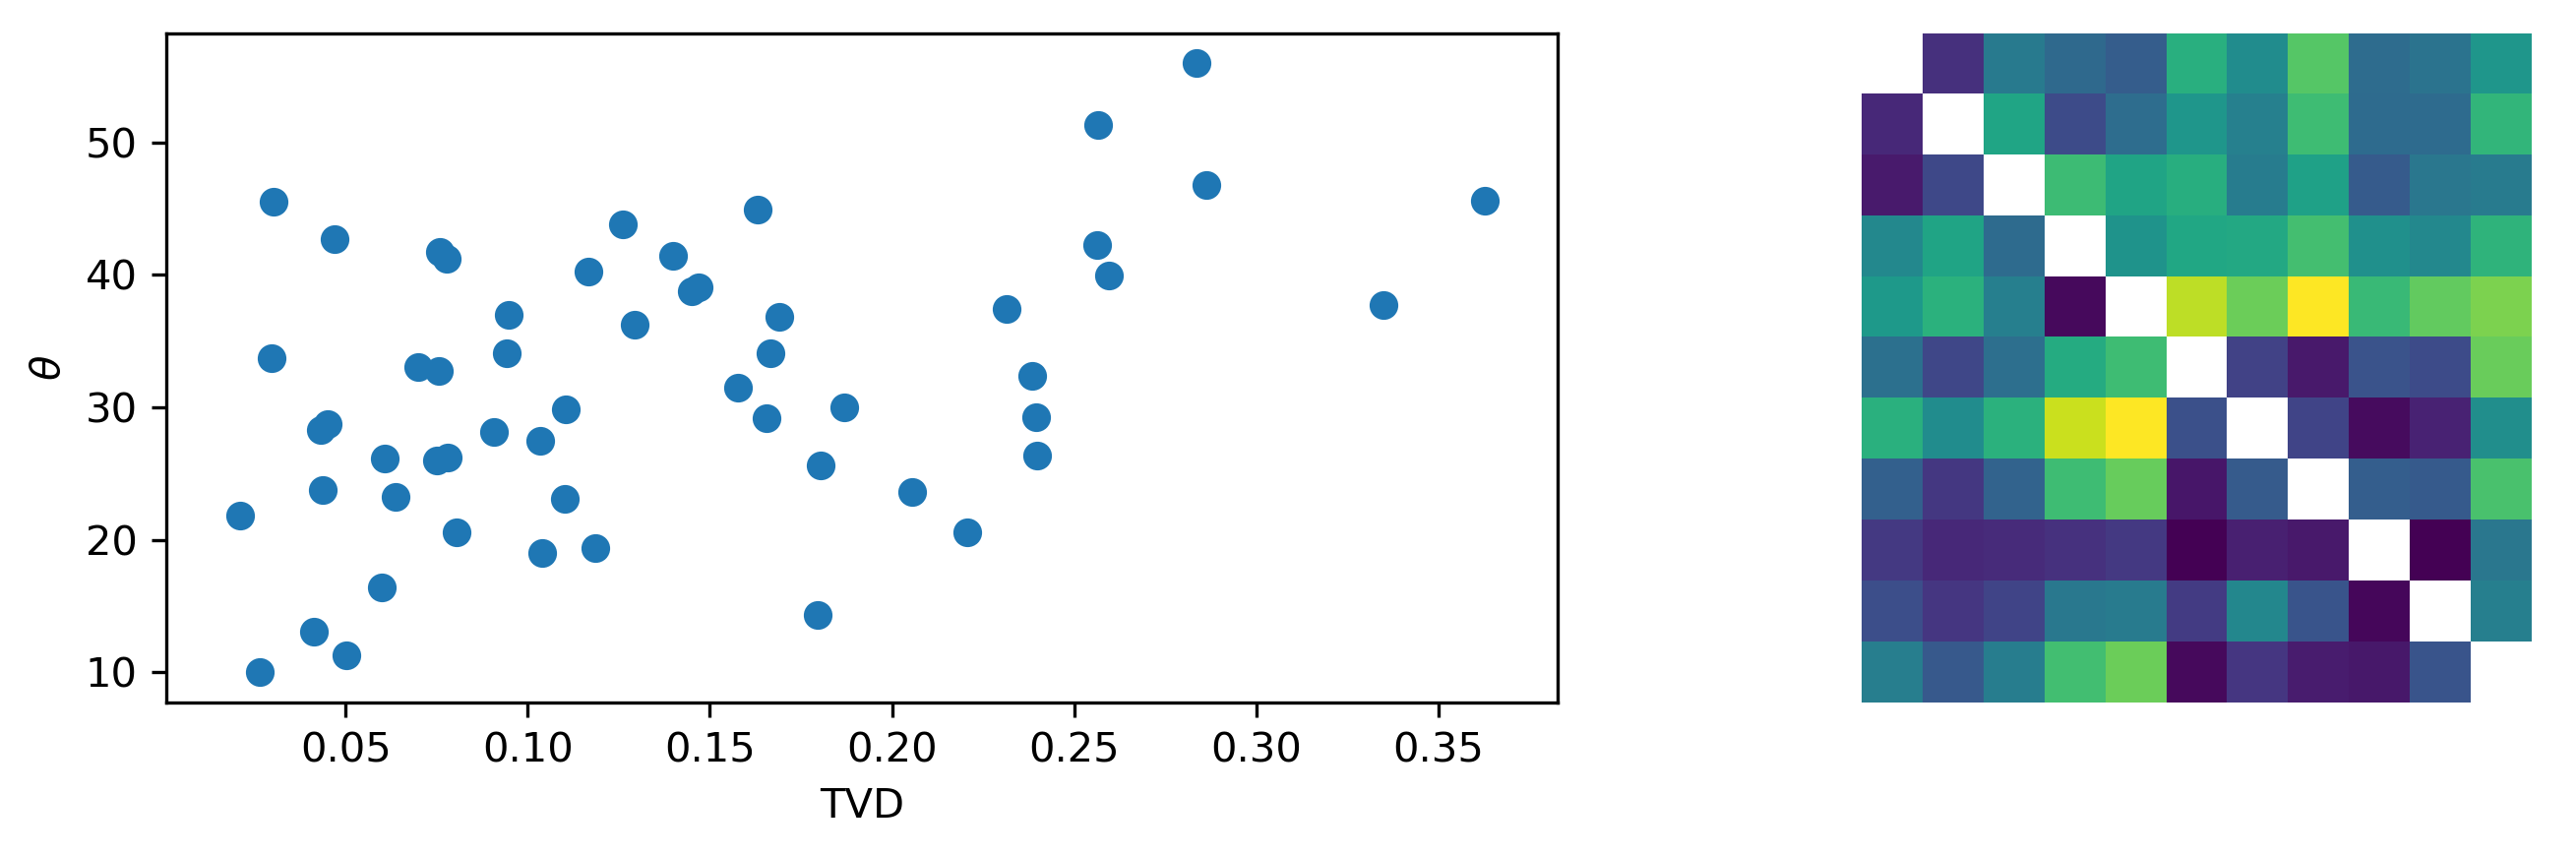

In [8]:
os.chdir(pathfig)

fig = plt.figure(figsize=(10,3), dpi=300)
gs  = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.scatter(tvds, theta)
ax1.set_ylabel(r'$\theta$')
ax1.set_xlabel('TVD')
ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(scaled_dists)
ax2.axis('off')

plt.tight_layout()
plt.savefig("Figure4.png", dpi=300, bbox_inches='tight')
plt.show()